In [2]:
import os
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

# Define 20 categories and their corresponding websites
categories = {
    "Technology": ["https://techcrunch.com", "https://www.theverge.com", "https://www.wired.com"],
    "Science": ["https://www.sciencedaily.com", "https://www.livescience.com", "https://www.nature.com"],
    "Sports": ["https://www.espn.com", "https://www.sportskeeda.com", "https://www.skysports.com"],
    "Health": ["https://www.webmd.com", "https://www.medicalnewstoday.com", "https://www.healthline.com"],
    "Business": ["https://www.forbes.com", "https://www.businessinsider.com", "https://www.cnbc.com"],
    "Education": ["https://www.edutopia.org", "https://www.education.com", "https://www.timeshighereducation.com"],
    "Entertainment": ["https://www.rollingstone.com", "https://www.billboard.com", "https://www.hollywoodreporter.com"],
    "Politics": ["https://www.politico.com", "https://www.bbc.com/news/politics", "https://www.nytimes.com/section/politics"],
    "Finance": ["https://www.marketwatch.com", "https://www.fool.com", "https://www.investopedia.com"],
    "Environment": ["https://www.nationalgeographic.com", "https://www.worldwildlife.org", "https://www.climatecentral.org"],
    "Automobile": ["https://www.caranddriver.com", "https://www.autoblog.com", "https://www.motortrend.com"],
    "Gaming": ["https://www.ign.com", "https://www.pcgamer.com", "https://www.gamespot.com"],
    "Fashion": ["https://www.vogue.com", "https://www.elle.com", "https://www.gq.com"],
    "Travel": ["https://www.lonelyplanet.com", "https://www.cntraveler.com", "https://www.travelandleisure.com"],
    "Food": ["https://www.foodnetwork.com", "https://www.seriouseats.com", "https://www.epicurious.com"],
    "History": ["https://www.history.com", "https://www.britannica.com", "https://www.smithsonianmag.com/history"],
    "Artificial Intelligence": ["https://www.aitrends.com", "https://www.analyticsvidhya.com", "https://www.deeplearning.ai"],
    "Cybersecurity": ["https://www.cybersecurity-insiders.com", "https://www.darkreading.com", "https://www.csoonline.com"],
    "Startups": ["https://www.startupgrind.com", "https://www.angel.co", "https://www.ycombinator.com"],
    "Space Exploration": ["https://www.nasa.gov", "https://www.spacex.com", "https://www.esa.int"],
}

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word not in stopwords.words('english') and word.isalpha()]  # Remove stopwords
    return ' '.join(words)

# Create a directory to store text files
if not os.path.exists("text_datasets"):
    os.makedirs("text_datasets")

# Scraping function
def scrape_text(category, urls):
    all_text = ""
    for url in urls:
        try:
            response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
            soup = BeautifulSoup(response.text, "html.parser")
            
            # Extract text from paragraphs
            paragraphs = soup.find_all("p")
            content = '\n'.join([para.get_text() for para in paragraphs])
            clean_content = clean_text(content)
            all_text += clean_content + "\n\n"
        except Exception as e:
            print(f"Error scraping {url}: {e}")
    
    # Save text to a file
    with open(f"text_datasets/{category}.txt", "w", encoding="utf-8") as file:
        file.write(all_text)
    print(f"Saved text data for {category}")

# Run the scraper for each category
for category, urls in categories.items():
    scrape_text(category, urls)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Saved text data for Technology
Saved text data for Science
Saved text data for Sports
Saved text data for Health
Saved text data for Business
Saved text data for Education
Saved text data for Entertainment
Saved text data for Politics
Saved text data for Finance
Saved text data for Environment
Saved text data for Automobile
Saved text data for Gaming
Saved text data for Fashion
Saved text data for Travel
Saved text data for Food
Saved text data for History
Saved text data for Artificial Intelligence
Saved text data for Cybersecurity
Saved text data for Startups
Saved text data for Space Exploration


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


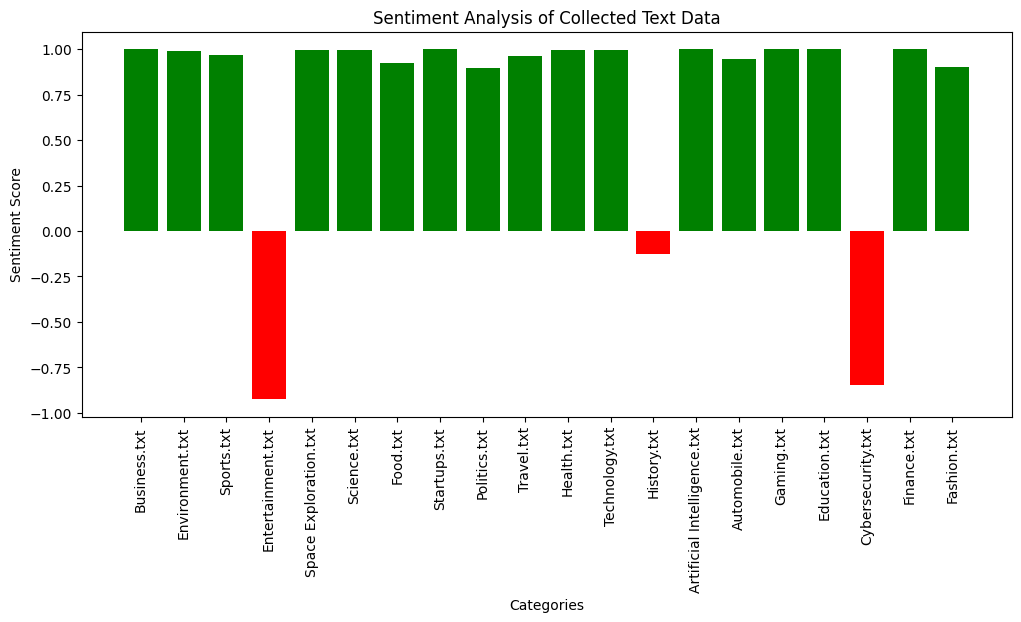

Business.txt: Positive (Score: 0.9999)
Environment.txt: Positive (Score: 0.9914)
Sports.txt: Positive (Score: 0.9674)
Entertainment.txt: Negative (Score: -0.9242)
Space Exploration.txt: Positive (Score: 0.993)
Science.txt: Positive (Score: 0.9967)
Food.txt: Positive (Score: 0.9258)
Startups.txt: Positive (Score: 0.9996)
Politics.txt: Positive (Score: 0.8961)
Travel.txt: Positive (Score: 0.9644)
Health.txt: Positive (Score: 0.9954)
Technology.txt: Positive (Score: 0.9975)
History.txt: Negative (Score: -0.128)
Artificial Intelligence.txt: Positive (Score: 0.9997)
Automobile.txt: Positive (Score: 0.9468)
Gaming.txt: Positive (Score: 0.9995)
Education.txt: Positive (Score: 0.9984)
Cybersecurity.txt: Negative (Score: -0.8481)
Finance.txt: Positive (Score: 0.9977)
Fashion.txt: Positive (Score: 0.9042)


In [7]:
import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define the dataset directory
dataset_dir = "text_datasets"

# Function to read text files and analyze sentiment
def analyze_sentiment():
    sentiment_scores = {}
    
    for file in os.listdir(dataset_dir):
        if file.endswith(".txt"):
            with open(os.path.join(dataset_dir, file), "r", encoding="utf-8") as f:
                text = f.read()
                sentiment = sia.polarity_scores(text)
                sentiment_scores[file] = sentiment['compound']
    
    return sentiment_scores

# Get sentiment scores
sentiments = analyze_sentiment()

# Plot sentiment scores
plt.figure(figsize=(12, 5))
plt.bar(sentiments.keys(), sentiments.values(), color=['green' if v > 0 else 'red' for v in sentiments.values()])
plt.xlabel("Categories")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis of Collected Text Data")
plt.xticks(rotation=90)
plt.show()

# Print sentiment results
for category, score in sentiments.items():
    sentiment_label = "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"
    print(f"{category}: {sentiment_label} (Score: {score})")
